In [ ]:
# TensorFlow
import tensorflow as tf

# Helper libs
import numpy as np
import matplotlib.pyplot as plt

fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scale train images from 0-255 to 0-1 before feeding to the NN model
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
# Display the first 25 images to confirm training set format is correct
plt.figure(figsize=(8,8))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
# Set up NN layers using Keras
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)), # reformat data
    tf.keras.layers.Dense(128, activation='relu'), # rectified linear unit
    tf.keras.layers.Dense(10) # 10 dress classes
])

https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/


In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

1. Adam optimization is a stochastic gradient descent method that is based on adaptive estimation of first-order and second-order moments
2. Loss function to minimize
3. Monitor training and testing steps

## Train the model
Training the neural network model requires the following steps:

Feed the training data to the model. In this example, the training data is in the train_images and train_labels arrays.
The model learns to associate images and labels.
You ask the model to make predictions about a test set—in this example, the test_images array.
Verify that the predictions match the labels from the test_labels array.

In [ ]:
model.fit(train_images, train_labels, epochs=10)

In [ ]:
# Evaluate accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents overfitting. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data.

In [ ]:
# Make predictions
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)
print("Predicted: " + str(np.argmax(predictions[0])))
print("Actual: " + str(test_labels[0]))


In [211]:
# Graph to look at the full set of 10 class predictions
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

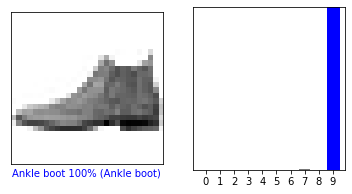

In [212]:
# Verify predictions
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

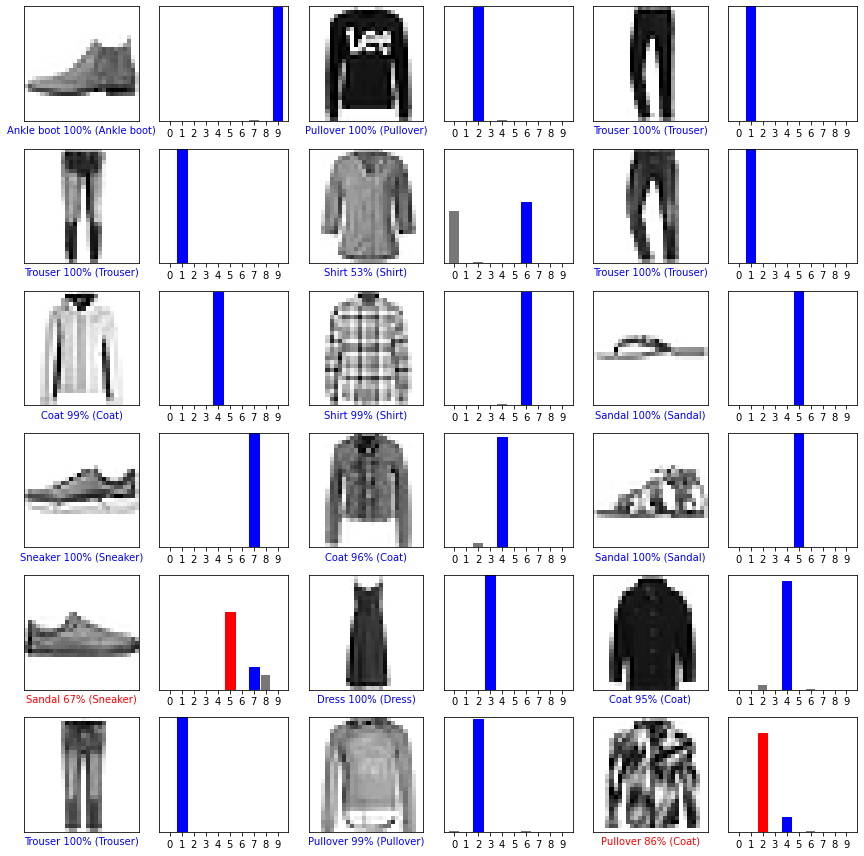

In [213]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 6
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

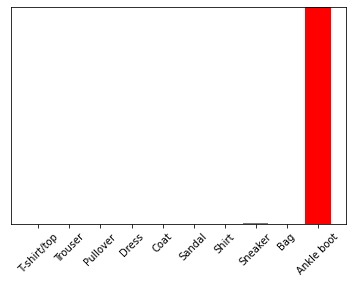

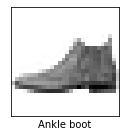

In [221]:
imgno = 0
img = test_images[imgno]
img = (np.expand_dims(img,0))
predictions_single = probability_model.predict(img)
plot_value_array(1, predictions_single[0], test_labels) # predicted
plt.xticks(range(10), class_names, rotation=45)


plt.figure(figsize=(2,2))
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(test_images[imgno], cmap=plt.cm.binary) # actual
plt.xlabel(class_names[test_labels[imgno]])
plt.show() 


In [215]:
np.argmax(predictions_single[0])

9